<a href="https://colab.research.google.com/github/easthometown/HMP_Dataset/blob/coursera/Copy_of_Superhero_Name_Generator_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero (and Supervillain) Name Generator

---

[Superhero Names Dataset](https://github.com/am1tyadav/superhero)

## Task 2

1. Import the data
2. Create a tokenizer
3. Char to index and Index to char dictionaries

In [1]:
!git clone https://github.com/am1tyadav/superhero

Cloning into 'superhero'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [5]:
with open('/content/superhero/superheroes.txt','r') as f:
  data=f.read()

data[:100]

'jumpa\t\ndoctor fate\t\nstarlight\t\nisildur\t\nlasher\t\nvarvara\t\nthe target\t\naxel\t\nbattra\t\nchangeling\t\npyrrh'

In [6]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [7]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~',
    split='\n',
)

In [8]:
tokenizer.fit_on_texts(data)

In [11]:
char_to_index=tokenizer.word_index
index_to_char=tokenizer.word_indexindex_to_char=dict((v,k) for k,v in char_to_index.items())

print(index_to_char)

{1: '\t', 2: 'a', 3: 'e', 4: 'r', 5: 'o', 6: 'n', 7: 'i', 8: ' ', 9: 't', 10: 's', 11: 'l', 12: 'm', 13: 'h', 14: 'd', 15: 'c', 16: 'u', 17: 'g', 18: 'k', 19: 'b', 20: 'p', 21: 'y', 22: 'w', 23: 'f', 24: 'v', 25: 'j', 26: 'z', 27: 'x', 28: 'q'}


## Task 3

1. Converting between names and sequences

In [12]:
names=data.splitlines()
names[:10]

['jumpa\t',
 'doctor fate\t',
 'starlight\t',
 'isildur\t',
 'lasher\t',
 'varvara\t',
 'the target\t',
 'axel\t',
 'battra\t',
 'changeling\t']

In [13]:
tokenizer.texts_to_sequences(names[0])

[[25], [16], [12], [20], [2], [1]]

In [14]:
def name_to_seq(name):
  return [tokenizer.texts_to_sequences(c)[0][0] for c in name]

In [15]:
name_to_seq(names[0])

[25, 16, 12, 20, 2, 1]

In [16]:
def seq_to_name(seq):
  return ''.join([index_to_char[i] for i in seq if i != 0])

In [17]:
seq_to_name(name_to_seq(names[0]))

'jumpa\t'

## Task 4

1. Creating sequences
2. Padding all sequences

In [18]:
sequences =[]

for name in names:
  seq=name_to_seq(name)
  if len(seq)>=2:
    sequences +=[seq[:i] for i in range(2, len(seq)+1)]

In [19]:
sequences[:10]

[[25, 16],
 [25, 16, 12],
 [25, 16, 12, 20],
 [25, 16, 12, 20, 2],
 [25, 16, 12, 20, 2, 1],
 [14, 5],
 [14, 5, 15],
 [14, 5, 15, 9],
 [14, 5, 15, 9, 5],
 [14, 5, 15, 9, 5, 4]]

In [20]:
max_len = max([len(x) for x in sequences])
print(max_len)

33


In [21]:
padded_sequences=tf.keras.preprocessing.sequence.pad_sequences(
    sequences,padding='pre',
    maxlen=max_len
)

print(padded_sequences[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 25 16]


In [22]:
padded_sequences.shape

(88279, 33)

## Task 5: Creating Training and Validation Sets

1. Creating training and validation sets

In [23]:
x,y = padded_sequences[:,:-1],padded_sequences[:,-1]
print(x.shape,y.shape)

(88279, 32) (88279,)


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(66209, 32) (66209,)
(22070, 32) (22070,)


In [26]:
num_chars=len(char_to_index.keys())+1
print(num_chars)

29


## Task 6: Creating the Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D,MaxPool1D,LSTM
from tensorflow.keras.layers import Bidirectional, Dense

model=Sequential([
                  Embedding(num_chars,8,input_length=max_len-1),
                  Conv1D(64,5,strides=1,activation='tanh',padding='causal'),
                  MaxPool1D(2),
                  LSTM(32),
                  Dense(num_chars,activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 32, 8)             232       
                                                                 
 conv1d_2 (Conv1D)           (None, 32, 64)            2624      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 64)           0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 29)                957       
                                                                 
Total params: 16,229
Trainable params: 16,229
Non-trainable params: 0
__________________________________________________

## Task 7: Training the Model

In [ ]:
h=model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=50,verbose=2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)
    ]
)

## Task 8: Generate Names!

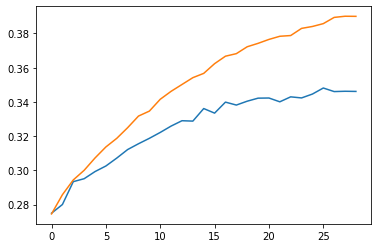

In [36]:
from matplotlib import pyplot as plt

epochs_ran=len(h.history['loss'])
plt.plot(range(0,epochs_ran),h.history['val_accuracy'],label='Validation')
plt.plot(range(0,epochs_ran),h.history['accuracy'],label='Training')
plt.show()

In [38]:
def generate_names(seed):
  for i in range(0,40):
    seq = name_to_seq(seed)
    padded=tf.keras.preprocessing.sequence.pad_sequences([seq],padding='pre',
                                                         maxlen=max_len-1,
                                                         truncating='pre')
    pred=model.predict(padded)[0]
    pred_char=index_to_char[tf.argmax(pred).numpy()]
    seed+=pred_char
    if pred_char =='\t':
      break
  print(seed)

In [41]:
generate_names('x')

xena shark	
